# Web Scraping

In [1]:
#Archivos incluidos en la pagina web
import requests
url = "https://gutenberg.org/ebooks/1112.txt.utf-8"
resp = requests.get(url)
print(resp) #https://www.w3.org/Protocols/rfc2616/rfc2616-sec10.html

<Response [200]>


In [2]:
type(resp)

requests.models.Response

In [3]:
path = "C:\\Big Data\\" 
with open(path + "ryj.txt", "wb") as arch:
    arch.write(resp.content)

In [4]:
import urllib.request
signos = ",*./#[]"
cuenta = 0 
pal = [] #lista
with urllib.request.urlopen("https://gutenberg.org/ebooks/1112.txt.utf-8") as info:
    for linea in info.readlines():
        limpia = linea.decode("utf-8").lower()
        for s in signos:
            limpia = limpia.replace(s, "  ")#Gracias Octavio
            #cuenta = cuenta + 1
        #extend append en la lista
        pal.extend(limpia.split())
#print(cuenta)
print(len(pal))
#print(pal)
            

29174


In [5]:
#Otra maneras expresiones regulares
apellido = ("capulet", "montague") #Montesco
nombres = ("romeo", "juliet", "tybalt","mercutio")

In [6]:
ap = {a: pal.count(a) for a in apellido}
no = {n: pal.count(n) for n in nombres}

In [7]:
print(ap)
print(no)

{'capulet': 29, 'montague': 26}
{'romeo': 111, 'juliet': 56, 'tybalt': 47, 'mercutio': 19}


In [8]:
ap.values()

dict_values([29, 26])

In [9]:
ap.keys()

dict_keys(['capulet', 'montague'])

In [12]:
#Ahora a graficar
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Frecuencias de familias rivales')

<Figure size 576x396 with 0 Axes>

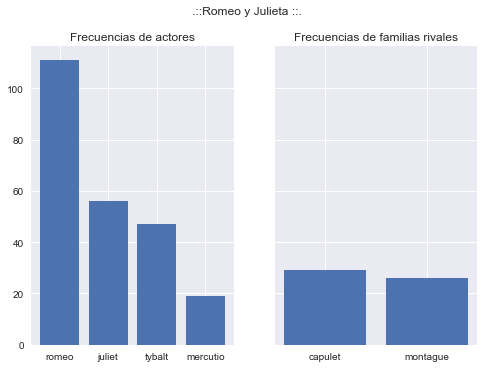

In [17]:
#estilo
plt.style.use("seaborn")
#Crear una figura
fig = plt.figure()
fig, axes = plt.subplots(1, 2, sharey= True)
fig.suptitle(".::Romeo y Julieta ::.")
plt.sca(axes[0]) #activamos el plot
#plt.xticks(rotation=30) #rotar las llaves
axes[0].bar(no.keys(), no.values())
axes[0].set_title("Frecuencias de actores")
axes[1].bar(ap.keys(), ap.values())
axes[1].set_title("Frecuencias de familias rivales")

In [18]:
#Tiempo real : Calidad del aire <<Madrid>>
#Formato de archivo:
#Columnas 0, 1, 2: estación metereológica
#Columnas 3, 4 y 5: valor medido.Columna 3: oxido de nitrógeno 12
#Columnas 6, 7 y 8: año, mes, día
#Columnas 9-56 datos especificos de la calidad del aire pero están en pares: 
#valor (hora), verificación V Ok, N -no validado
import requests
url = "http://www.mambiente.madrid.es/opendata/horario.txt"
resp = requests.get(url)
print(resp)

<Response [200]>


In [19]:
path = "C:\\Big Data\\" 
with open(path + "horario.txt", "wb") as arch:
    arch.write(resp.content)

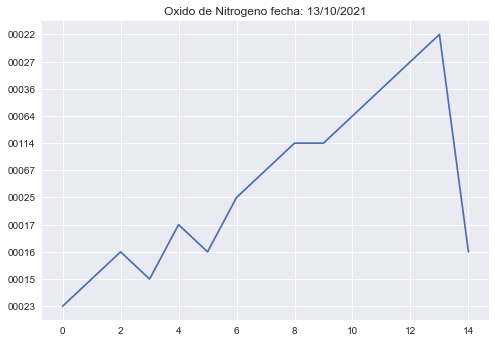

In [21]:
import matplotlib.pyplot as plt
import csv
with open (path +"horario.txt") as arch:
    lector = csv.reader(arch, delimiter=",")
    for linea in lector:
        if linea[3] =="12":
            hora = 0
            col = 9
            lista = [] #Datos de ON NO2
            horas = [] #Horario
            while hora <= 23:
                if linea[col+2*hora+1] =="V": #V= valido, N: No valido
                    lista.append(linea[col+2*hora])
                    horas.append(hora)
                hora = hora + 1
plt.title("Oxido de Nitrogeno fecha: " + linea[8]+ "/" + linea[7]+"/"+ linea[6])
plt.plot(horas, lista)
plt.show()

In [ ]:
#Datos que forman parte de una pagina web
#html


In [3]:
from bs4 import BeautifulSoup

In [4]:
import urllib.request
import bs4

In [7]:
pagina = urllib.request.urlopen('http://www.itlalaguna.edu.mx')
html = pagina.read()
#BeautifulSoup es una biblioteca que ayuda a analizar datos en archivos html
sopa = bs4.BeautifulSoup(html,'html.parser')

In [8]:
type(html)

bytes

In [9]:
type(sopa)

bs4.BeautifulSoup

In [11]:
sopa

<!DOCTYPE html>
<html lang="en"><head>
<!-- Global site tag (gtag.js) - Google Analytics urbilily =UA-54252992-1 solo www-->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-54252992-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-54252992-1');
</script>
<script crossorigin="anonymous" integrity="sha256-9/aliU8dGd2tb6OSsuzixeV4y/faTqgFtohetphbbj0=" src="https://code.jquery.com/jquery-3.5.1.min.js"></script>
<!-- Global site tag (gtag.js) - Google Analytics itlsitioweb UA-180691430-1  dominio itlalaguna.edu.mx -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-180691430-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-180691430-1');
</script>
<!-- Global site tag (gtag.js) - Google Analytics G-JTN8QDY5L0 lalaguna.tecnm.mx --

In [12]:
sopa.title

<title>Instituto Tecnológico de La Laguna</title>

In [13]:
type(sopa.title)

bs4.element.Tag

In [14]:
sopa.title.text

'Instituto Tecnológico de La Laguna'

In [16]:
sopa.body.text

'\n    \n\n/*     $(\'.dropdown-menu a.dropdown-toggle\').on(\'click\', function(e) {\n        if (!$(this).next().hasClass(\'show\')) {\n            $(this).parents(\'.dropdown-menu\').first().find(\'.show\').removeClass(\'show\');\n        }\n        var $subMenu = $(this).next(\'.dropdown-menu\');\n        $subMenu.toggleClass(\'show\');\n\n\n        $(this).parents(\'li.nav-item.dropdown.show\').on(\'hidden.bs.dropdown\', function(e) {\n            $(\'.dropdown-submenu .show\').removeClass(\'show\');\n        });\n\n \n        return false;\n    }); */\n\n\n\n\n    a {\n        color: white !important;\n        font-size: large;\n    }\n\n    @media (min-width: 960px) {\n        .dropdown:hover>.dropdown-menu {\n            display: block;\n        }\n\n        \n    }\n\n    .dropdown-submenu {\n        position: relative;\n    }\n\n    .dropdown-submenu a::after {\n        transform: rotate(-90deg);\n        position: absolute;\n        right: 6px;\n        top: .8em;\n    }\n\n

In [17]:
lista = sopa.body.select('div')

In [18]:
print(lista)

[<div class="collapse navbar-collapse" id="navbarNav">
        <ul class="navbar-nav mr-auto">
            <li class="nav-item active">
                <a class="nav-link" href="#"> <span class="sr-only">(current)</span></a>
            </li>

        </ul>
        <ul class="navbar-nav" style="margin-right: 10%;">
            <li class="nav-item">
                <a class="nav-link" href="https://www.gob.mx/gobierno" style="color: white;"> Gobierno</a>
            </li>

            <li class="nav-item">
                <a class="nav-link" href="https://www.gob.mx/participa" style="color: white;">Participa</a>
            </li>

            <li class="nav-item">
                <a class="nav-link" href="https://datos.gob.mx " style="color: white;">Datos</a>
            </li>

            <li class="nav-item">
                <a class="nav-item nav-link active" href="https://www.gob.mx/busqueda" style="color: white;">
                    <span class="sr-only">Búsqueda</span>
          

In [19]:
lista[10]

<div class="dropdown-menu" style="background:#454547;">
                   
                   <!-- <a class="text-black dropdown-item" href="http://apps2.itlalaguna.edu.mx:8081/">LICENCIATURA</a>-->
                   <a class="text-black dropdown-item" href="ADM.PHP">LICENCIATURA ENERO - JUNIO</a>
                    <a class="text-black dropdown-item" href="ADMcp.PHP">POSGRADO ENERO - JUNIO</a>
                    <a class="text-black dropdown-item" href="https://sites.google.com/correo.itlalaguna.edu.mx/nivelacion2021itl">NIVELACIÓN AGOSTO - DICIEMBRE</a>
                   <a class="text-black dropdown-item" href="ADMago.PHP">LICENCIATURA AGOSTO - DICIEMBRE</a>
                   <a class="text-black dropdown-item" href="ADMcpago.PHP">POSGRADO AGOSTO - DICIEMBRE</a>
                   
                  
                    
                    
                    
                    <!--<a class="text-black dropdown-item" href="ADMdis.PHP">LICENCIATURA MODALIDAD A DISTANCIA</a>

In [20]:
[e for e in lista]

[<div class="collapse navbar-collapse" id="navbarNav">
         <ul class="navbar-nav mr-auto">
             <li class="nav-item active">
                 <a class="nav-link" href="#"> <span class="sr-only">(current)</span></a>
             </li>
 
         </ul>
         <ul class="navbar-nav" style="margin-right: 10%;">
             <li class="nav-item">
                 <a class="nav-link" href="https://www.gob.mx/gobierno" style="color: white;"> Gobierno</a>
             </li>
 
             <li class="nav-item">
                 <a class="nav-link" href="https://www.gob.mx/participa" style="color: white;">Participa</a>
             </li>
 
             <li class="nav-item">
                 <a class="nav-link" href="https://datos.gob.mx " style="color: white;">Datos</a>
             </li>
 
             <li class="nav-item">
                 <a class="nav-item nav-link active" href="https://www.gob.mx/busqueda" style="color: white;">
                     <span class="sr-only">Búsq

In [ ]:
sopa.find_all("div")

In [ ]:
sopa.find_all("img")

In [ ]:
sopa.find("body")

In [ ]:
sopa.find_all("img")